In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_table("amazonreviews.tsv")
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
df.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [ ]:
df["label"].replace({"neg":0, "pos":1}, inplace=True)

In [ ]:
df.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
df["label"].value_counts()

0    5097
1    4903
Name: label, dtype: int64

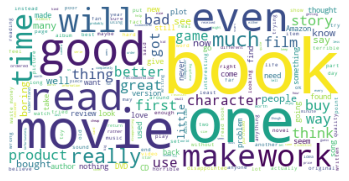

In [ ]:
wc = WordCloud(background_color="white")

wc.generate(" ".join(df[df["label"]==0]["review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

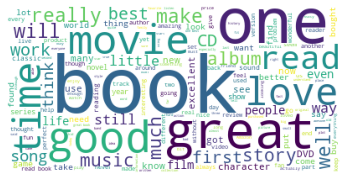

In [ ]:
wc = WordCloud(background_color="white")

wc.generate(" ".join(df[df["label"]==1]["review"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
def text_clean(text):
  tokens = word_tokenize(text.lower())
  word_tokens = [t for t in tokens if(t.isalpha())]
  stop = stopwords.words("english")
  cleantoken = [t for t in word_tokens if(t not in stop)]
  lemma = WordNetLemmatizer()
  lemmatoken = [lemma.lemmatize(t) for t in cleantoken]
  return " ".join(lemmatoken)

In [ ]:
df["review"] =df["review"].apply(text_clean)

In [ ]:
x = df["review"]
y = df["label"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
len(df["review"][0].split())

42

In [ ]:
sentlen = []

for sent in df["review"]:
  sentlen.append(len(word_tokenize(sent)))

df["sentlen"] = sentlen
df.head()

,label,review,sentlen
0,1,stuning even sound track beautiful paint sener...,42
1,1,best soundtrack ever anything reading lot revi...,44
2,1,amazing soundtrack favorite music time hand in...,67
3,1,excellent soundtrack truly like soundtrack enj...,68
4,1,remember pull jaw floor hearing played game kn...,46


In [ ]:
max(sentlen)

140

In [ ]:
np.quantile(sentlen, 0.95)

79.0

In [ ]:
#95% of the words in document has len 79

In [ ]:
max_len = 79

In [ ]:
tok = Tokenizer(char_level=False, split=" ")
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'book',
 2: 'one',
 3: 'movie',
 4: 'like',
 5: 'read',
 6: 'good',
 7: 'great',
 8: 'would',
 9: 'time',
 10: 'get',
 11: 'really',
 12: 'story',
 13: 'even',
 14: 'work',
 15: 'make',
 16: 'could',
 17: 'first',
 18: 'much',
 19: 'well',
 20: 'love',
 21: 'buy',
 22: 'year',
 23: 'best',
 24: 'better',
 25: 'product',
 26: 'character',
 27: 'thing',
 28: 'way',
 29: 'think',
 30: 'film',
 31: 'cd',
 32: 'also',
 33: 'little',
 34: 'ever',
 35: 'bad',
 36: 'want',
 37: 'new',
 38: 'many',
 39: 'know',
 40: 'never',
 41: 'people',
 42: 'back',
 43: 'see',
 44: 'got',
 45: 'music',
 46: 'find',
 47: 'money',
 48: 'album',
 49: 'say',
 50: 'reading',
 51: 'life',
 52: 'go',
 53: 'song',
 54: 'game',
 55: 'still',
 56: 'bought',
 57: 'use',
 58: 'made',
 59: 'recommend',
 60: 'found',
 61: 'give',
 62: 'dvd',
 63: 'review',
 64: 'two',
 65: 'thought',
 66: 'lot',
 67: 'look',
 68: 'old',
 69: 'take',
 70: 'day',
 71: 'need',
 72: 'every',
 73: 'put',
 74: 'star',
 75: 'another',
 76: 

In [ ]:
vocab_len = len(tok.index_word)

In [ ]:
vocab_len

22203

In [ ]:
seqtrain = tok.texts_to_sequences(xtrain) #step1
seqtrain

[[135,
  112,
  323,
  3,
  4547,
  117,
  5,
  1,
  65,
  8,
  179,
  61,
  24,
  153,
  11,
  583,
  1510,
  3493,
  22,
  112,
  46,
  1511,
  480,
  66,
  9,
  8559,
  2146,
  2735,
  274,
  2146,
  2735,
  480,
  33,
  9,
  707,
  690,
  1510,
  3493,
  6892,
  274,
  3,
  120,
  39,
  1182,
  3,
  400,
  1,
  21,
  1,
  5,
  306,
  1023,
  6893,
  179,
  483,
  8560,
  2146,
  2885,
  1511,
  5843,
  2146,
  2146,
  2886,
  115,
  4548],
 [247,
  467,
  302,
  450,
  664,
  11614,
  2248,
  450,
  1550,
  467,
  71,
  230,
  1024,
  1335,
  25,
  171,
  2072,
  88,
  370,
  8,
  57,
  8561,
  450,
  1910,
  430,
  110,
  27,
  1241,
  940,
  233,
  450,
  52,
  1369,
  285],
 [27,
  409,
  44,
  107,
  8562,
  1370,
  16,
  391,
  303,
  212,
  107,
  88,
  191,
  73,
  3051,
  468,
  177,
  251,
  734,
  10,
  1158,
  4549,
  73,
  330,
  9,
  1025,
  11615],
 [375,
  2147,
  699,
  111,
  2147,
  699,
  1462,
  111,
  307,
  81,
  2607,
  3,
  62,
  2,
  30,
  2608,
  260,
  13

In [ ]:
#135 112 323 3

#pretty dissappointed saw movie

# 135: 'pretty',
# 112: 'disappointed',
# 323: 'saw',
# 3: 'movie',

In [ ]:
seqmatrix = sequence.pad_sequences(seqtrain, maxlen=max_len)

In [ ]:
seqmatrix

array([[    0,     0,     0, ...,  2886,   115,  4548],
       [    0,     0,     0, ...,    52,  1369,   285],
       [    0,     0,     0, ...,     9,  1025, 11615],
       ...,
       [    0,     0,     0, ...,    47,   226,   112],
       [    0,     0,     0, ...,     9,  1642,    41],
       [    0,     0,     0, ...,  1746,     1,   498]], dtype=int32)

In [ ]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1, 700, input_length=max_len, mask_zero=True))
rnn.add(SimpleRNN(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")
rnn.fit(seqmatrix, ytrain, batch_size=50, epochs=50)

seqtest = sequence.pad_sequences(tok.texts_to_sequences(xtest), maxlen=max_len)

ypred = rnn.predict(seqtest)
ypred = ypred >0.5

%time

Epoch 1/50
140/140 [==============================] - 32s 217ms/step - loss: 0.5507
Epoch 2/50
140/140 [==============================] - 29s 205ms/step - loss: 0.2185
Epoch 3/50
140/140 [==============================] - 29s 206ms/step - loss: 0.0521
Epoch 4/50
140/140 [==============================] - 29s 205ms/step - loss: 0.0096
Epoch 5/50
140/140 [==============================] - 29s 206ms/step - loss: 0.0022
Epoch 6/50
140/140 [==============================] - 29s 205ms/step - loss: 0.0021
Epoch 7/50
140/140 [==============================] - 29s 206ms/step - loss: 5.2399e-04
Epoch 8/50
140/140 [==============================] - 29s 205ms/step - loss: 3.3574e-04
Epoch 9/50
140/140 [==============================] - 29s 205ms/step - loss: 2.4000e-04
Epoch 10/50
140/140 [==============================] - 29s 205ms/step - loss: 1.9997e-04
Epoch 11/50
140/140 [==============================] - 29s 205ms/step - loss: 1.5523e-04
Epoch 12/50
140/140 [==============================] -

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1509
           1       0.81      0.81      0.81      1491

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000



In [ ]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1, 700, input_length=max_len, mask_zero=True))
#rnn.add(SimpleRNN(units=32, activation="tanh"))

rnn.add(LSTM(units=32, activation="tanh"))

rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")
rnn.fit(seqmatrix, ytrain, batch_size=50, epochs=50)

seqtest = sequence.pad_sequences(tok.texts_to_sequences(xtest), maxlen=max_len)

ypred = rnn.predict(seqtest)
ypred = ypred >0.5

Epoch 1/50
140/140 [==============================] - 44s 276ms/step - loss: 0.4777
Epoch 2/50
140/140 [==============================] - 42s 298ms/step - loss: 0.1829
Epoch 3/50
140/140 [==============================] - 38s 273ms/step - loss: 0.0662
Epoch 4/50
140/140 [==============================] - 38s 272ms/step - loss: 0.0445
Epoch 5/50
140/140 [==============================] - 40s 283ms/step - loss: 0.0221
Epoch 6/50
140/140 [==============================] - 38s 272ms/step - loss: 0.0115
Epoch 7/50
140/140 [==============================] - 38s 274ms/step - loss: 0.0192
Epoch 8/50
140/140 [==============================] - 38s 273ms/step - loss: 0.0122
Epoch 9/50
140/140 [==============================] - 38s 273ms/step - loss: 0.0165
Epoch 10/50
140/140 [==============================] - 38s 272ms/step - loss: 0.0079
Epoch 11/50
140/140 [==============================] - 38s 274ms/step - loss: 0.0082
Epoch 12/50
140/140 [==============================] - 38s 274ms/step - lo